In [61]:
pip install -r ../requirement.txt

Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.float_format', '{:.6f}'.format)
# Mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

##### **Precios de las bebidas no alcóholicas**

Iniciamos analizando los precios de los productos de bebidas no alcóholicas dado que son un producto de consumo masivo presente en todo el territorio nacional.

In [63]:
colores = {
    'Express': 'orange',
    'Market': 'red',
    'Hipermercado Carrefour': 'blue',
}
productos_df = pd.read_csv('productos_procesado.zip', sep='|')

# Al leer el csv las columnas vuelven a ser sus tipos nativos entonces las reconvertimon a categóricas
productos_df['id_sucursal'] = productos_df['id_sucursal'].astype('category')
productos_df['id_producto'] = productos_df['id_producto'].astype('category')
productos_df['productos_unidad_medida_presentacion'] = productos_df['productos_unidad_medida_presentacion'].astype('category')
productos_df['productos_marca'] = productos_df['productos_marca'].astype('category')
productos_df['productos_unidad_medida_referencia'] = productos_df['productos_unidad_medida_referencia'].astype('category')
productos_df['comercio_bandera_nombre'] = productos_df['comercio_bandera_nombre'].astype('category')
productos_df['id_producto_code'] = productos_df['id_producto'].cat.codes

productos_df = productos_df[productos_df['productos_descripcion'].str.contains('^gaseosa|^agua', case=False, na=False)]
display(productos_df.head())
display(productos_df.info())

,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2,precio_zscore,id_bandera,sucursales_nombre,sucursales_tipo,sucursales_latitud,sucursales_longitud,sucursales_barrio,sucursales_localidad,sucursales_provincia,comercio_bandera_nombre,localidad_provincia,id_producto_code
6,120,7791813402022,True,AGUA SABORIZADA LIMON S GAS H2OH X 500 CC,1.0,UNI,H2OH!,1400.0,2800.00,500.0,CM3,NaN,NaN,NaN,NaN,0.625964,2,Belgrano Cabildo,Supermercado,-34.558821,-58.459349,NaN,Ciudad Autónoma de Buenos Aires,CABA,Market,Ciudad Autónoma de Buenos Aires - CABA,6980
7,209,7791720029978,True,GASEOSA LIGHT POMELO CARREFOUR CLASSIC PET X2....,1.0,UNI,CARREFOUR CLASSIC,1540.0,684.44,2250.0,CM3,1450.0,Promo A valida desde el 29/04/2025 hasta 06/05...,NaN,NaN,-0.177897,2,Martinez (Libertador),Supermercado,-34.490270,-58.484964,NaN,Martínez,Buenos Aires,Market,Martínez - Buenos Aires,6259
52,258,7790895000997,True,GASEOSA COLA REGULAR COCA COLA PET X 2.25 LT,1.0,UNI,COCA COLA,4200.0,1866.67,2250.0,CM3,NaN,NaN,NaN,NaN,0.327471,2,Villa Pueyrredon,Supermercado,-34.585933,-58.501809,NaN,Ciudad Autónoma de Buenos Aires,CABA,Market,Ciudad Autónoma de Buenos Aires - CABA,4416
93,477,7791813421603,True,AGUA SABORIZADA CITRUS C GAS H2OH PET X 1.5 LT,1.0,UNI,H2OH!,2159.0,1439.33,1500.0,CM3,NaN,NaN,NaN,NaN,-0.180236,3,E. Pérez 4566,Supermercado,-34.773098,-58.645218,Gonzalez Catan,La Matanza,Buenos Aires,Express,La Matanza - Buenos Aires,6993
130,256,7798159715755,True,GASEOSA TONICA REG CARREFOUR PET X 2.25 LT,1.0,UNI,CARREFOUR,1540.0,684.44,2250.0,CM3,1450.0,Promo A valida desde el 29/04/2025 hasta 06/05...,NaN,NaN,-0.177107,2,San Nicolás II,Supermercado,-33.335962,-60.222474,NaN,San Nicolás,Buenos Aires,Market,San Nicolás - Buenos Aires,10229


<class 'pandas.core.frame.DataFrame'>
Index: 12365 entries, 6 to 370585
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   id_sucursal                           12365 non-null  category
 1   id_producto                           12365 non-null  category
 2   productos_ean                         12365 non-null  bool    
 3   productos_descripcion                 12365 non-null  object  
 4   productos_cantidad_presentacion       12365 non-null  float64 
 5   productos_unidad_medida_presentacion  12365 non-null  category
 6   productos_marca                       12365 non-null  category
 7   productos_precio_lista                12365 non-null  float64 
 8   productos_precio_referencia           12365 non-null  float64 
 9   productos_cantidad_referencia         12365 non-null  float64 
 10  productos_unidad_medida_referencia    12365 non-null  category
 11  produc

None

In [64]:
productos_df["id_producto"].nunique()

313

In [65]:
productos_df["id_producto"].value_counts()

id_producto
7790639002423    77
7792799000097    77
7790895001000    77
7790639003819    77
7792931000015    76
                 ..
7790580033507     0
7790580102517     0
7790580103361     0
7790580103385     0
9002490258313     0
Name: count, Length: 11560, dtype: int64

De la ultima celda podemos analizar que hay productos que estan en TODAS las sucursales y que hay productos que no

Para tener un análisis acorde tomamos aquellos productos de bebidas no alcóholicas que están en los tres tipos de comercios.

In [66]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df.groupby('id_producto')['comercio_bandera_nombre'].nunique()

# Filtrar los productos que están en todas los comercios, que en nuestro caso son 3, expres, hiper, market
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 3].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df[productos_df['id_producto'].isin(productos_en_todas_sucursales)]
print(f"Cantidad de productos que estan en los 3 comercios: {len(productos_df_en_varias_sucursales['id_producto'].value_counts())}")

Cantidad de productos que estan en los 3 comercios: 11560


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_46744/3276425499.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df.groupby('id_producto')['comercio_bandera_nombre'].nunique()


Analizamos el precio máximo y mínimo de cada producto agrupado por el tipo de comercio.

In [67]:
print("Cantidad de productos para cada tipo de comercio:")
print(productos_df_en_varias_sucursales['comercio_bandera_nombre'].value_counts())

# Agrupar por id_producto y comercio_bandera_nombre y calcular el máximo y mínimo de precio_zscore
resultado = productos_df_en_varias_sucursales.groupby(['id_producto_code', 'comercio_bandera_nombre'])['precio_zscore'].agg(['max', 'min']).reset_index()

resultado.head()

Cantidad de productos para cada tipo de comercio:
comercio_bandera_nombre
Market                    6314
Express                   3327
Hipermercado Carrefour     150
Name: count, dtype: int64


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_46744/379206894.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado = productos_df_en_varias_sucursales.groupby(['id_producto_code', 'comercio_bandera_nombre'])['precio_zscore'].agg(['max', 'min']).reset_index()


,id_producto_code,comercio_bandera_nombre,max,min
0,3356,Express,0.236111,0.236111
1,3356,Hipermercado Carrefour,0.236111,0.236111
2,3356,Market,0.236111,-2.579943
3,3357,Express,0.132264,0.132264
4,3357,Hipermercado Carrefour,-0.952197,-0.952197


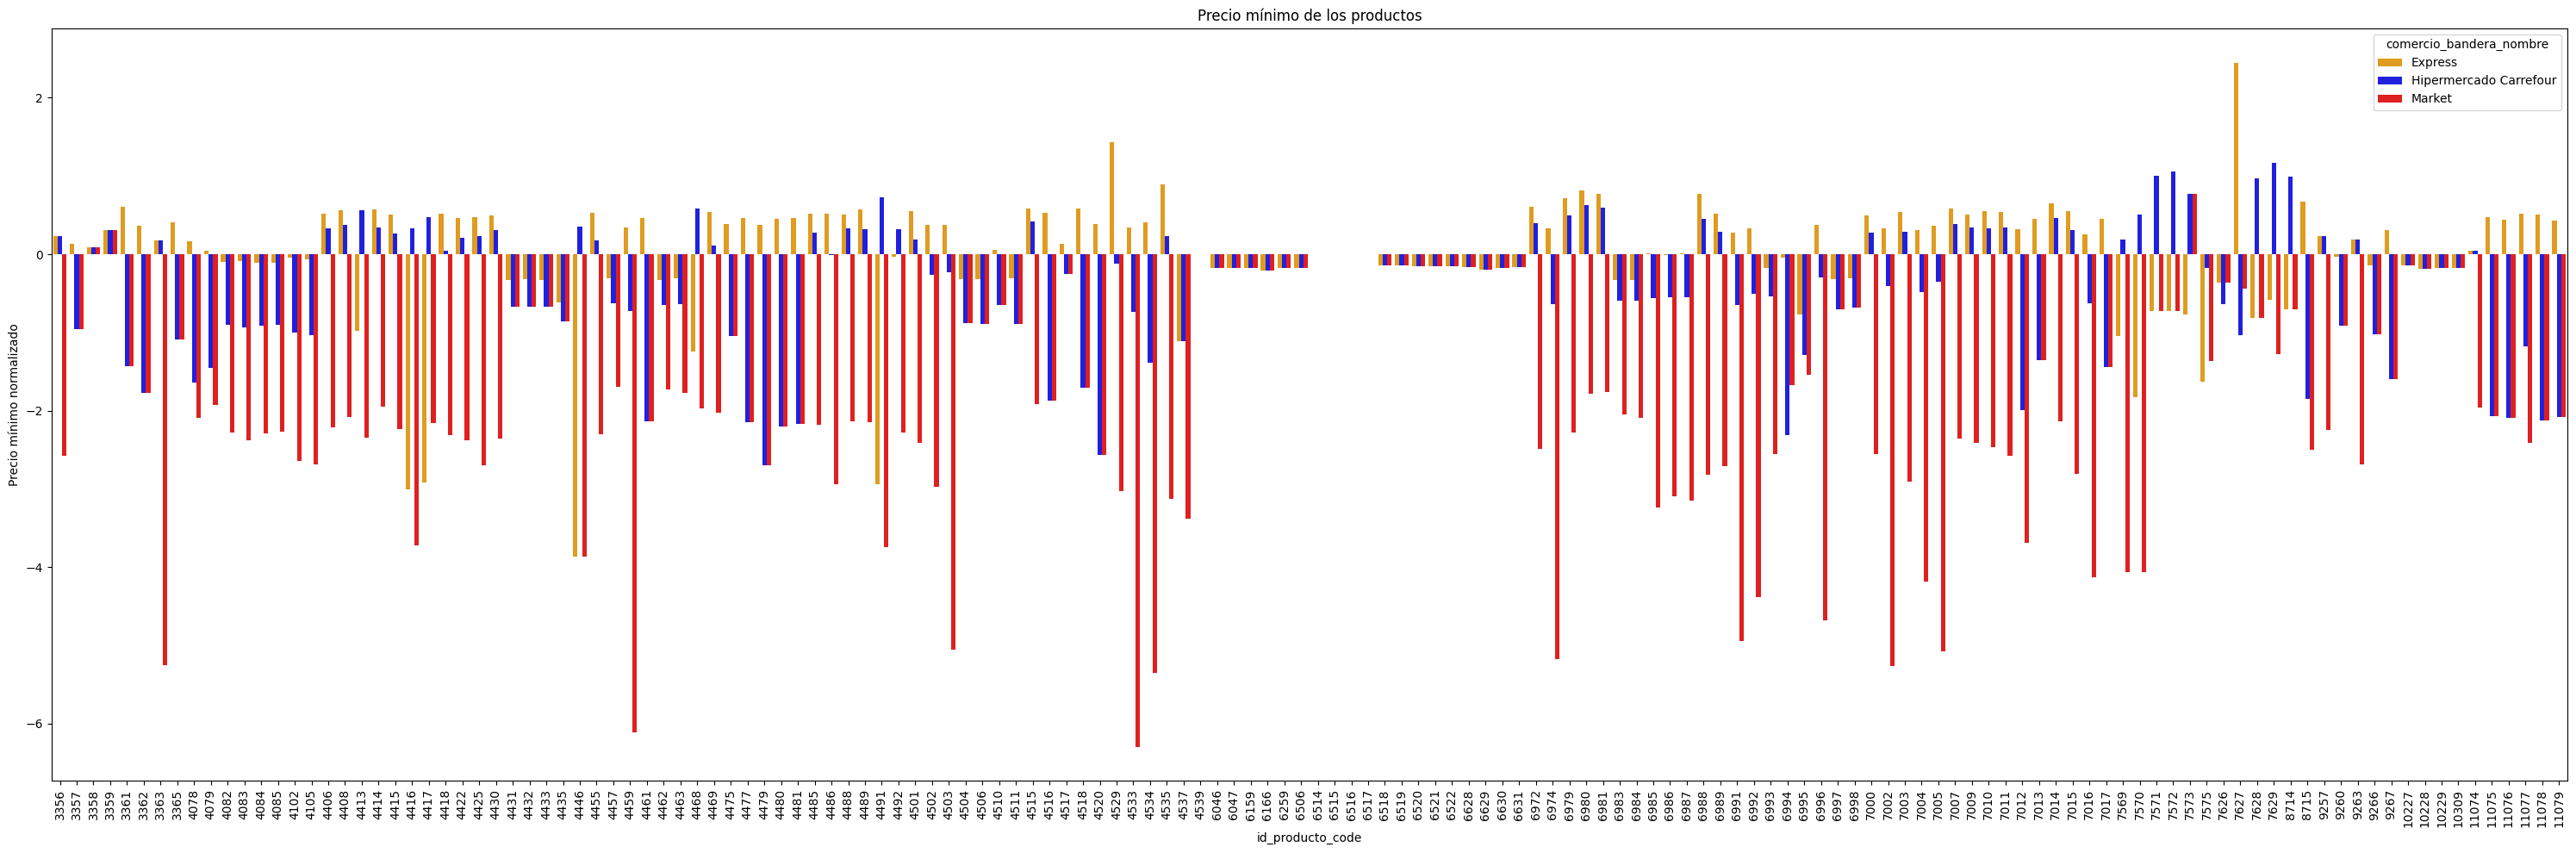

In [68]:
plt.figure(figsize=(30, 10))
sns.barplot(data=resultado, y='min', x='id_producto_code', hue='comercio_bandera_nombre', palette=colores)

plt.xticks(rotation=90)
plt.title("Precio mínimo de los productos")
plt.ylabel('Precio mínimo normalizado')
plt.tight_layout()
plt.show()

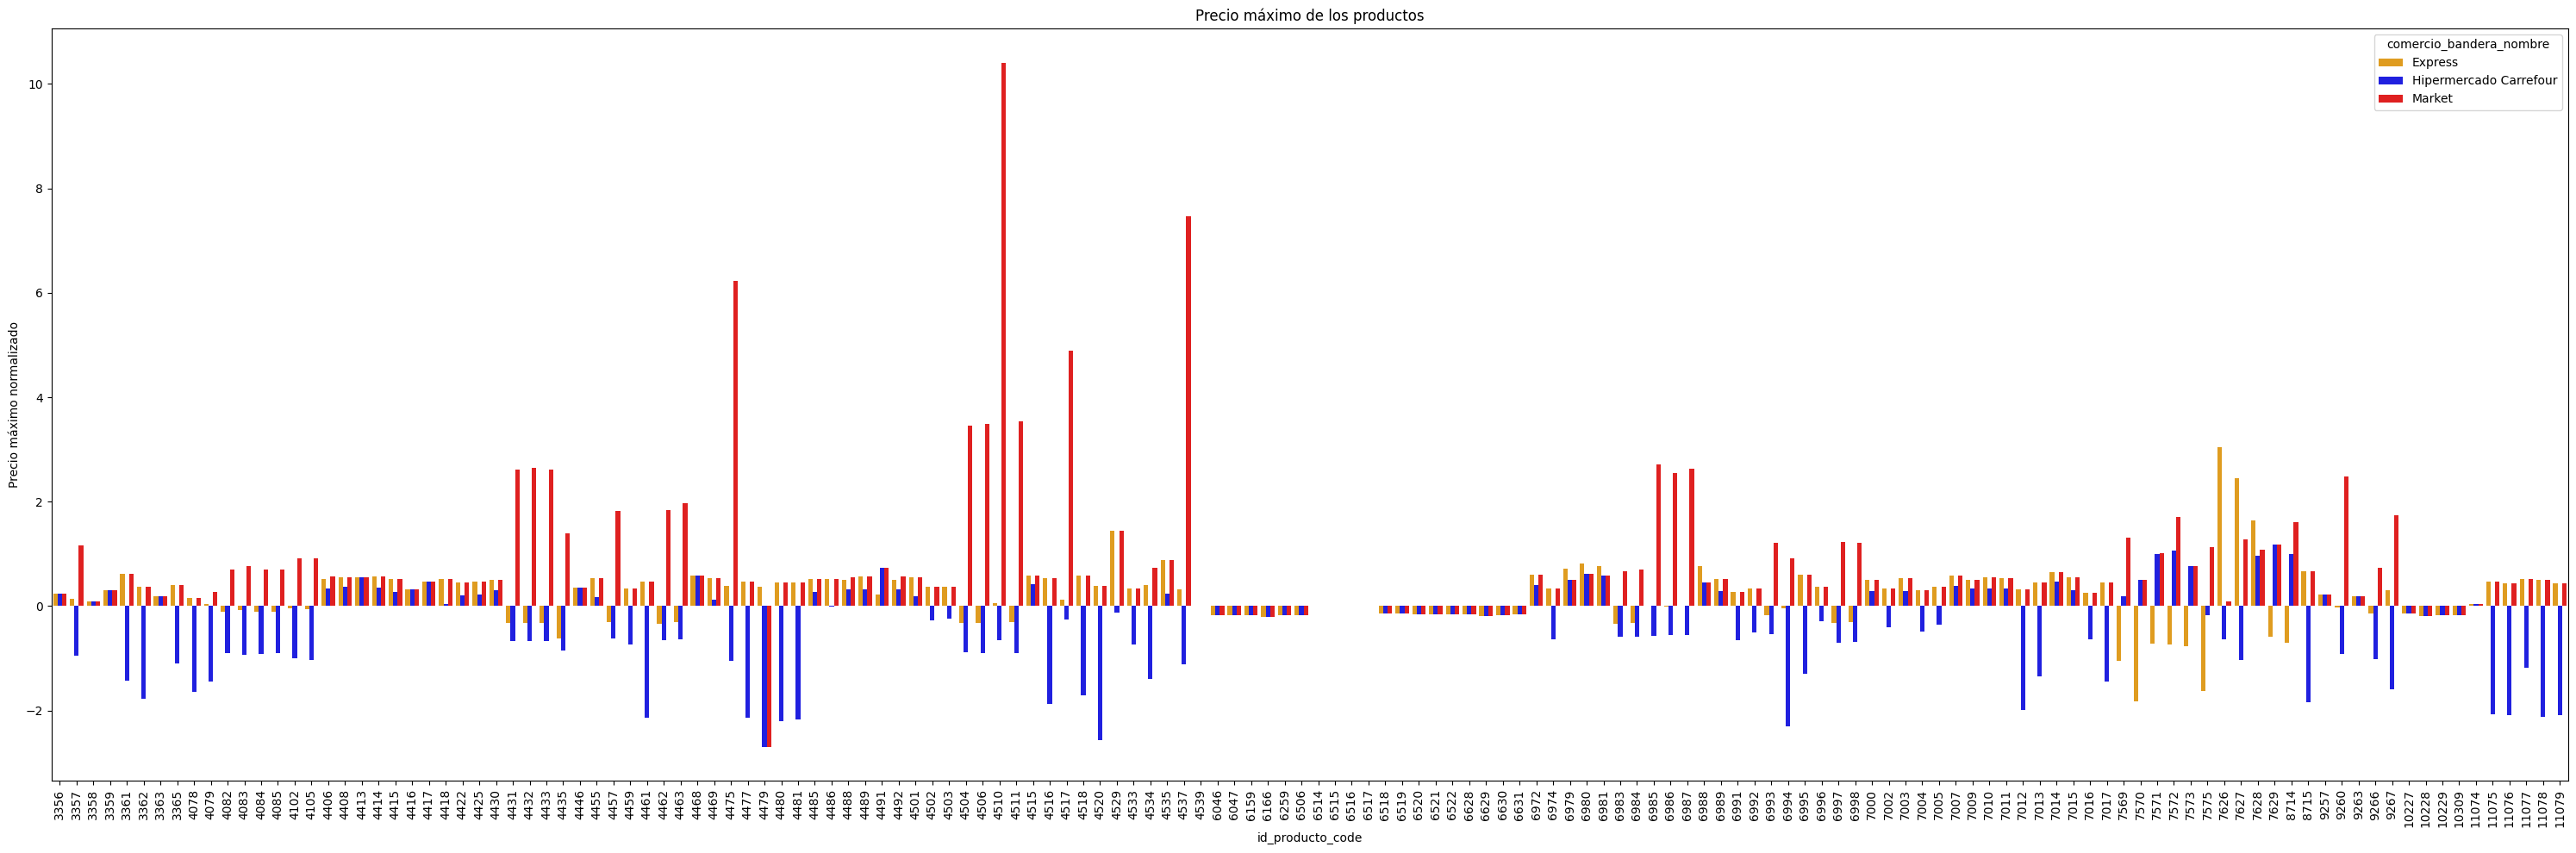

In [69]:
plt.figure(figsize=(30, 10))
sns.barplot(data=resultado, y='max', x='id_producto_code', hue='comercio_bandera_nombre', palette=colores)

plt.xticks(rotation=90)
plt.title("Precio máximo de los productos")
plt.ylabel('Precio máximo normalizado')
plt.tight_layout()
plt.show()

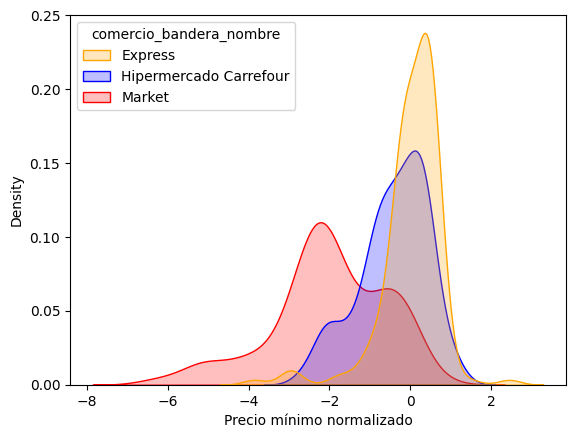

In [70]:
sns.kdeplot(data=resultado, x='min', hue='comercio_bandera_nombre', fill=True, palette=colores)
plt.xlabel('Precio mínimo normalizado')
plt.show()

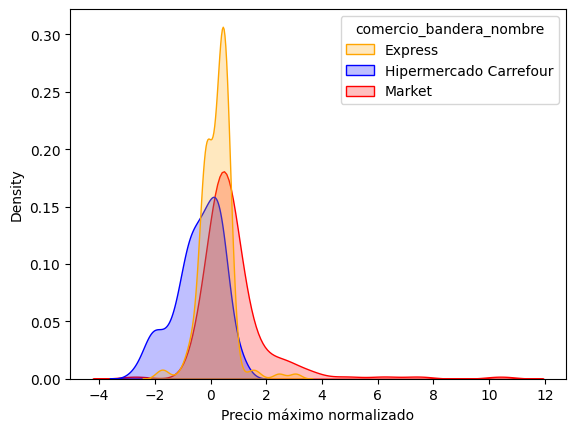

In [71]:
sns.kdeplot(data=resultado, x='max', hue='comercio_bandera_nombre', fill=True, palette=colores)
plt.xlabel('Precio máximo normalizado')
plt.show()

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_46744/1290604422.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre')['precio_zscore'].mean().sort_values()


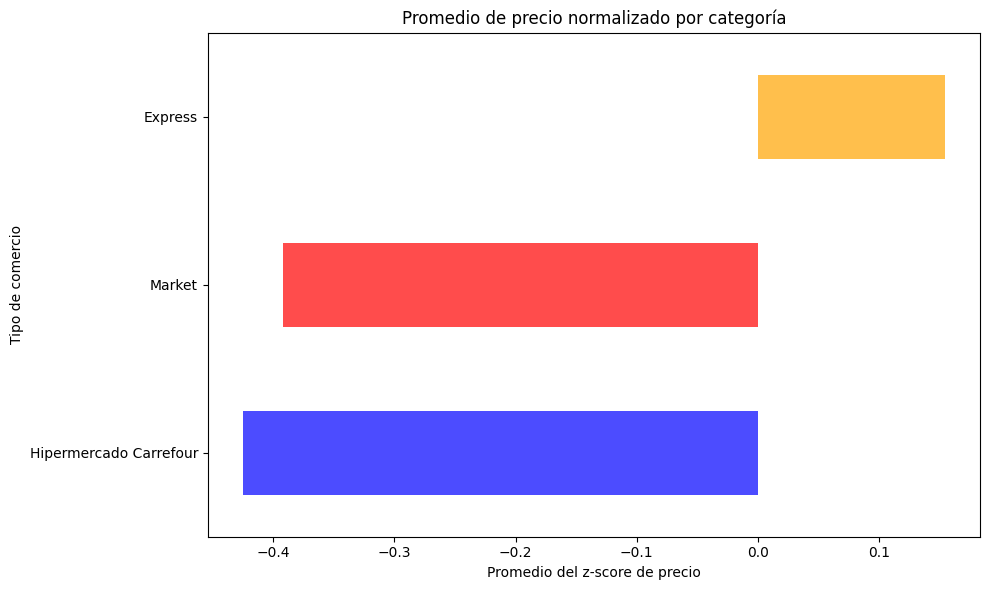

In [72]:
promedios = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre')['precio_zscore'].mean().sort_values()
# Hacer el gráfico de barras
colores_barras = [colores[nombre] for nombre in promedios.index]
promedios.plot(kind='barh', color=colores_barras, figsize=(10, 6), alpha=0.7)
plt.xlabel('Promedio del z-score de precio')
plt.ylabel('Tipo de comercio')
plt.title('Promedio de precio normalizado por categoría')
plt.tight_layout()
plt.show()